In [2]:
import pandas as pd
import numpy as np

In [3]:
with open("icecube_10year_ps/events/IC59_exp.csv", 'r') as f1:
    lines = f1.readlines()

In [4]:
content=[]
column=lines[0].split()
column.pop(0)
for line in lines[1:]:
    
    content.append(line.split())

data = pd.DataFrame(content, columns = column)
#data = data.drop(0)
data #ALL THE CONTENTS ARE IN STRING FORMAT NOT FLOAT

,MJD[days],log10(E/GeV),AngErr[deg],RA[deg],Dec[deg],Azimuth[deg],Zenith[deg]
0,54971.15869961,3.43,1.07,128.331,53.070,256.558,143.042
1,54971.15957109,3.37,1.19,223.406,1.740,161.854,91.693
2,54971.16164457,5.37,0.53,332.873,-24.509,53.126,65.540
3,54971.16429956,5.43,0.33,243.988,-74.954,142.781,15.016
4,54971.16634297,5.33,0.55,36.228,-22.282,351.498,67.767
...,...,...,...,...,...,...,...
107006,55347.24975340,5.82,0.86,358.582,-39.515,69.822,50.546
107007,55347.25588194,5.62,0.61,110.336,-40.464,320.340,49.518
107008,55347.25789030,3.39,1.17,150.619,27.546,280.710,117.500
107009,55347.26411744,3.39,0.50,213.782,-1.188,219.806,88.760


In [13]:
from matplotlib import pyplot as plt
from astroML.plotting import plot_tissot_ellipse
type(data['RA[deg]'])

pandas.core.series.Series

In [70]:
# generate a latitude/longitude grid
circ_long = np.linspace(-np.pi, np.pi, 13)[1:-1]
circ_lat = np.linspace(-np.pi / 2, np.pi / 2, 7)[1:-1]
radius = 10 * np.pi / 180.

In [ ]:
#fig = plt.figure(figsize=(64,48))
#plt.rcParams.update({'font.size': 48})
#for (i, projection) in enumerate(['Hammer', 'Aitoff', 'Mollweide', 'Lambert']):
#    ax = plt.subplot(221 + i, projection=projection.lower())
#    ax.scatter(data['RA[deg]'][:], data['Dec[deg]'][:],marker='o',color='b', s = 7,alpha=0.5)
#    ax.xaxis.set_major_locator(plt.FixedLocator(np.pi / 3
#                                                * np.linspace(-2, 2, 5)))
#    ax.xaxis.set_minor_locator(plt.FixedLocator(np.pi / 6
#                                                * np.linspace(-5, 5, 11)))
#    ax.yaxis.set_major_locator(plt.FixedLocator(np.pi / 6
#                                                * np.linspace(-2, 2, 5)))
#    ax.yaxis.set_minor_locator(plt.FixedLocator(np.pi / 12
#                                                * np.linspace(-5, 5, 11)))
#    ax.grid(True, which='major', color='r', lw=4)

#    plot_tissot_ellipse(circ_long[:, None], circ_lat, radius, ax=ax, fc='k', alpha=0.3, linewidth=0)
#ax.set_title('%s projection\n\n' % projection)
#plt.show()
#FINAL VERSION Dt 22-05-2022, PLOTS 'Hammer', 'Aitoff', 'Mollweide', 'Lambert'. PLOTS EVENT PROJECTIONS IN SKY COORDINATES


In [62]:
from astropy import units as u
from astropy.coordinates import SkyCoord as scr

r_a = [float(i) for i in data['RA[deg]']]
decl = [float(i) for i in data['Dec[deg]']]
#!!!DONOT USE GENERATORS IN ASTRPY.SKYCOORD THEY ARE NOT SUPPORTED!!!           Dt: 22-05-2022
#!!!SKYCOORD ONLY SUPPORTS NORMAL LISTS NOT EVEN NUMPY.NDARRAYS!!!
radec=scr(ra = r_a * u.degree, dec = decl * u.degree, frame = 'icrs')
print(radec[0])
radec = radec.galactic
#radec[0].galactic
#radec[0]
print(radec[0])
print(data['RA[deg]'][0])


<SkyCoord (ICRS): (ra, dec) in deg
    (128.331, 53.07)>
<SkyCoord (Galactic): (l, b) in deg
    (165.35304624, 36.47494358)>
128.331


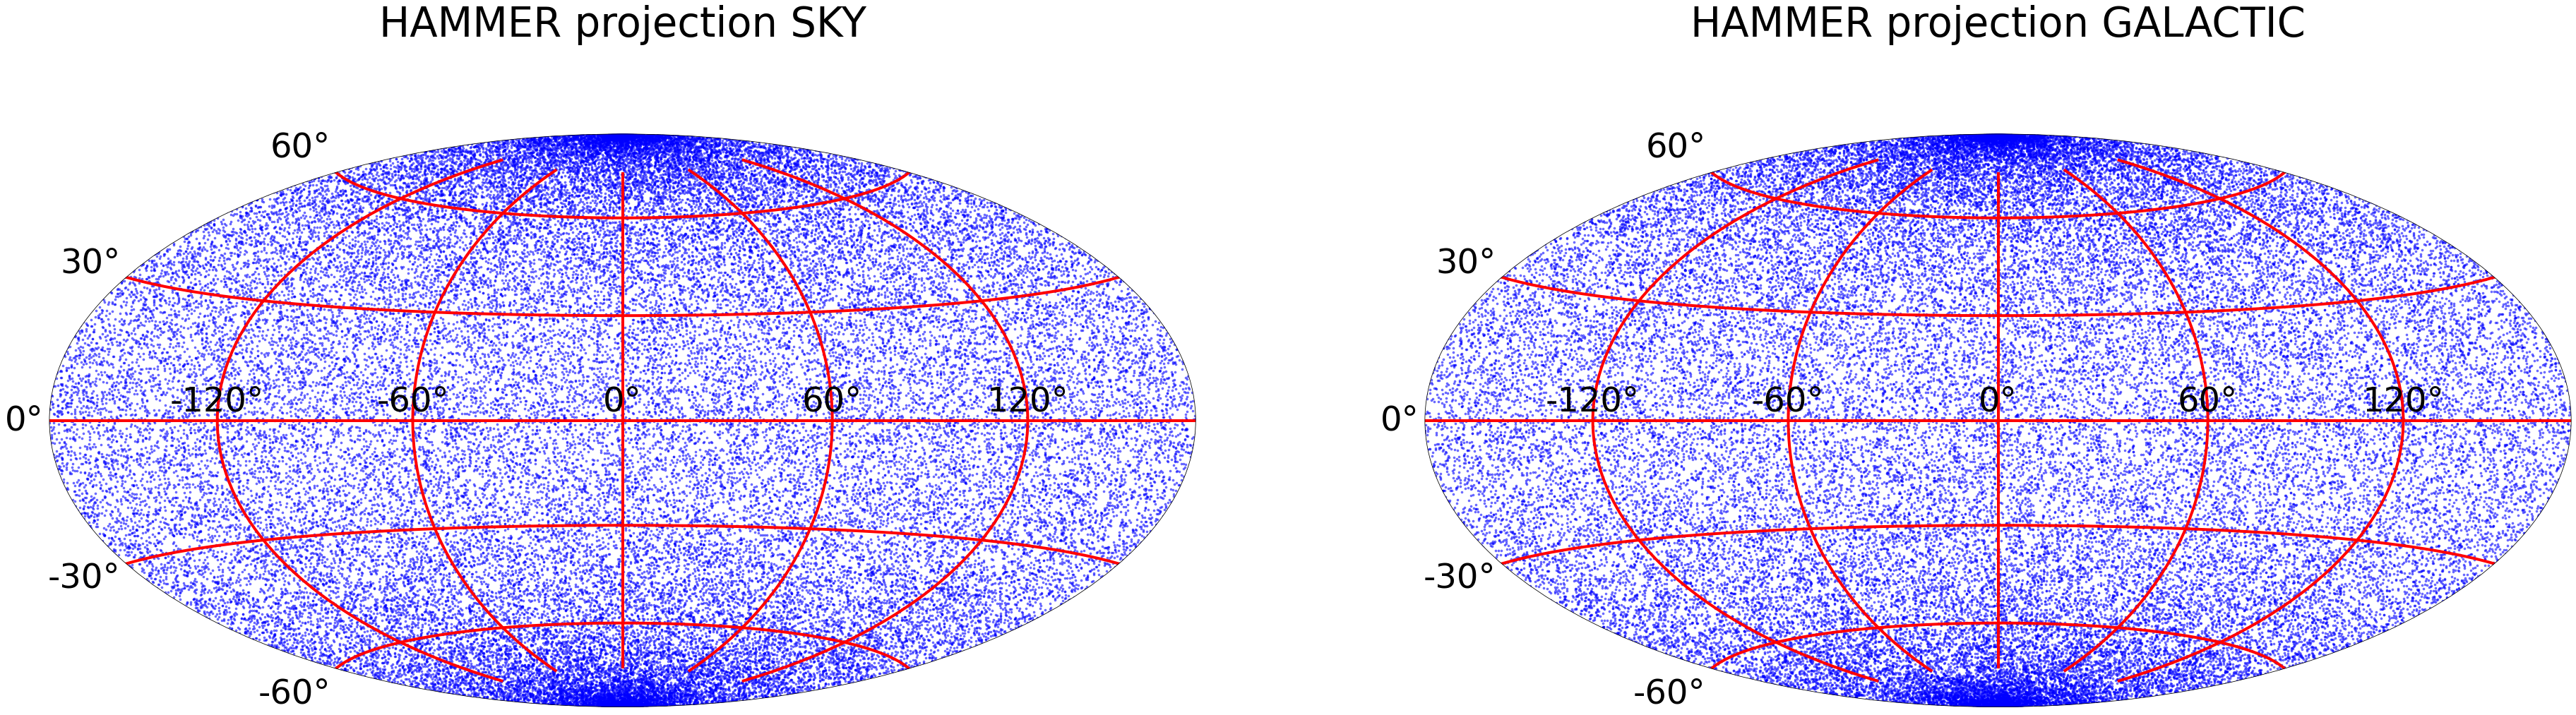

In [66]:
#EDIT 23-05-2022 WITH ASTROPY TO PROJECT IN GALACTIC COORDINATES
fig = plt.figure(figsize=(64,48))
#plt.rcParams.update({'font.size': 48})

ax1 = plt.subplot(221,projection='hammer')
ax1.scatter(radec.l, data['Dec[deg]'][:],marker='o',color='b', s = 7,alpha=0.5)

ax1.xaxis.set_major_locator(plt.FixedLocator(np.pi / 3 * np.linspace(-2, 2, 5)))
ax1.xaxis.set_minor_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-5, 5, 11)))
ax1.yaxis.set_major_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-2, 2, 5)))
ax1.yaxis.set_minor_locator(plt.FixedLocator(np.pi / 12 * np.linspace(-5, 5, 11)))
ax1.grid(True, which='major', color='r', lw=4)

ax2 = plt.subplot(222,projection='hammer')
ax2.scatter(radec.l.degree, radec.b.degree,marker='o',color='b', s = 7,alpha=0.5)
ax2.xaxis.set_major_locator(plt.FixedLocator(np.pi / 3 * np.linspace(-2, 2, 5)))
ax2.xaxis.set_minor_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-5, 5, 11)))
ax2.yaxis.set_major_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-2, 2, 5)))
ax2.yaxis.set_minor_locator(plt.FixedLocator(np.pi / 12 * np.linspace(-5, 5, 11)))
ax2.grid(True, which='major', color='r', lw=4)

#    plot_tissot_ellipse(circ_long[:, None], circ_lat, radius, ax=ax, fc='k', alpha=0.3, linewidth=0)
ax1.set_title('HAMMER projection SKY\n\n')
ax2.set_title('HAMMER projection GALACTIC\n\n')
plt.show()


In [ ]:
print()